# **Modelling**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('all_campus_combined.csv')

In [3]:
df['kampus'].unique()

array(['IT PLN', 'ITTS', 'Tel-U', 'UISI', 'ULBI', 'UPer'], dtype=object)

In [4]:
df = df.drop(columns=['kampus'])

In [5]:
X = df.drop('label_sentimen', axis=1)
y = df['label_sentimen'] # target

In [6]:
# === Split data menjadi train dan test set ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 1. SVM Model

In [7]:
from sklearn.impute import SimpleImputer

# Impute missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# === 4. Model SVM ===
print("\n=== Support Vector Machine (SVM) ===")
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_imputed, y_train)
y_pred_svm = svm_model.predict(X_test_imputed)
print(classification_report(y_test, y_pred_svm))
print("Akurasi:", accuracy_score(y_test, y_pred_svm))


=== Support Vector Machine (SVM) ===
              precision    recall  f1-score   support

     negatif       0.97      0.99      0.98       290
      netral       0.82      0.98      0.90       290
     positif       0.98      0.77      0.86       290

    accuracy                           0.91       870
   macro avg       0.92      0.91      0.91       870
weighted avg       0.92      0.91      0.91       870

Akurasi: 0.9137931034482759


<Figure size 500x400 with 0 Axes>

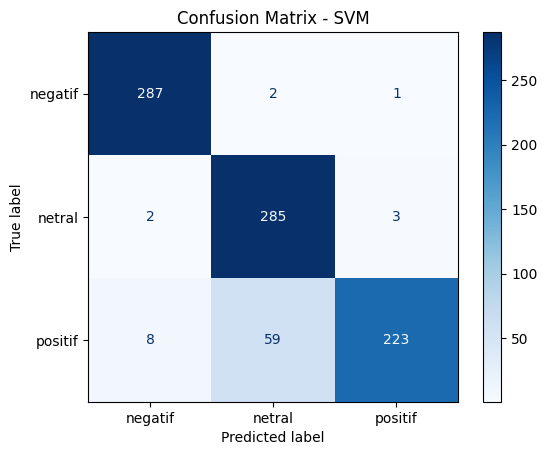

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt

# Confusion matrix untuk model SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
plt.figure(figsize=(5,4))
disp_svm.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()

### Hyperparameter Tuning dengan Grid Search CV

In [9]:
# Tuning SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Impute missing values in X_train and X_test
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_imputed, y_train)
svm_best = svm_grid.best_estimator_
svm_pred = svm_best.predict(X_test_imputed)
print("\n=== Support Vector Machine (SVM) ===")
print("Best Parameters:", svm_grid.best_params_)
print("Akurasi:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


=== Support Vector Machine (SVM) ===
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Akurasi: 0.9758620689655172
              precision    recall  f1-score   support

     negatif       0.99      1.00      0.99       290
      netral       0.97      0.97      0.97       290
     positif       0.97      0.96      0.96       290

    accuracy                           0.98       870
   macro avg       0.98      0.98      0.98       870
weighted avg       0.98      0.98      0.98       870



<Figure size 500x400 with 0 Axes>

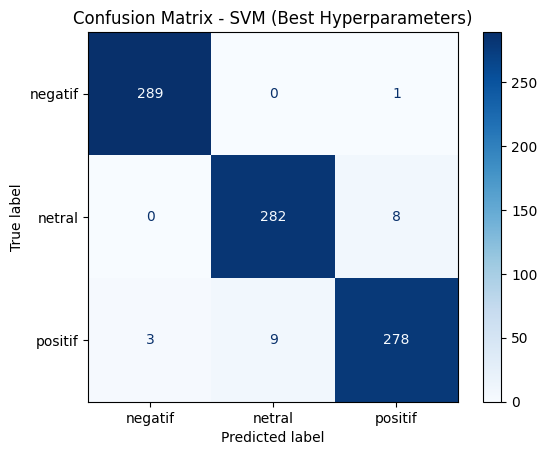

In [10]:
# Visualisasi confusion matrix untuk SVM hasil hyperparameter tuning
cm_svm_best = confusion_matrix(y_test, svm_pred, labels=svm_best.classes_)
disp_svm_best = ConfusionMatrixDisplay(confusion_matrix=cm_svm_best, display_labels=svm_best.classes_)
plt.figure(figsize=(5,4))
disp_svm_best.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM (Best Hyperparameters)")
plt.show()

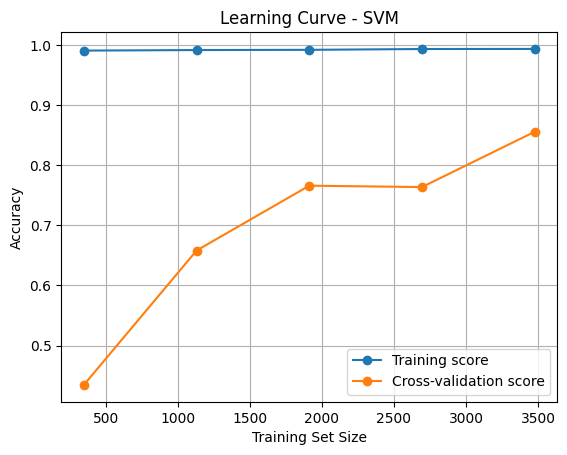

In [23]:
from sklearn.model_selection import learning_curve
import numpy as np

# Impute missing values in X before using learning_curve
X_imputed = imputer.transform(X)

train_sizes, train_scores, test_scores = learning_curve(
    svm_best, X_imputed, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - SVM")
plt.legend(loc="best")
plt.grid()
plt.show()


### Simpan model SVM

In [ ]:
import joblib

# Simpan model SVM hasil tuning (svm_best)
joblib.dump(svm_best, 'svm_best_model.joblib')

['svm_best_model.joblib']

## 2. Random Forest Model

In [11]:
print("\n=== Random Forest ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

     negatif       0.93      0.75      0.83       290
      netral       0.84      0.42      0.56       290
     positif       0.53      0.90      0.67       290

    accuracy                           0.69       870
   macro avg       0.77      0.69      0.69       870
weighted avg       0.77      0.69      0.69       870

Akurasi: 0.6896551724137931


<Figure size 500x400 with 0 Axes>

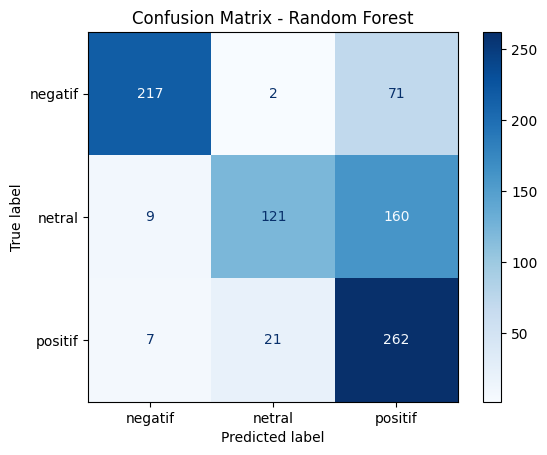

In [12]:
# Confusion matrix untuk model Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
plt.figure(figsize=(5,4))
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Hyperparameter Tuning dengan Grid Search CV

In [13]:
# Tuning Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
print("\n=== Random Forest ===")
print("Best Parameters:", rf_grid.best_params_)
print("Akurasi:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


=== Random Forest ===
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Akurasi: 0.7126436781609196
              precision    recall  f1-score   support

     negatif       0.92      0.82      0.87       290
      netral       0.78      0.44      0.57       290
     positif       0.57      0.87      0.69       290

    accuracy                           0.71       870
   macro avg       0.76      0.71      0.71       870
weighted avg       0.76      0.71      0.71       870



<Figure size 500x400 with 0 Axes>

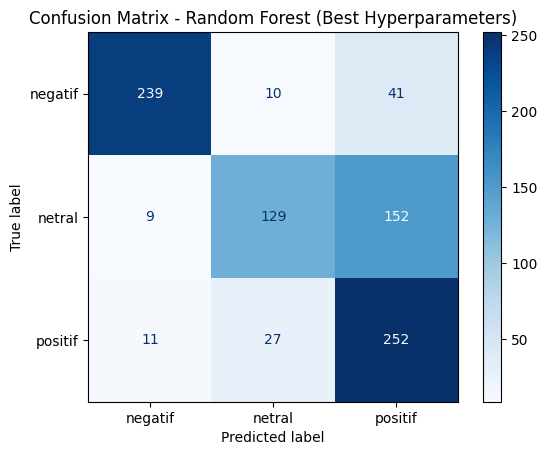

In [17]:
# Visualisasi confusion matrix untuk Random Forest hasil hyperparameter tuning
cm_rf_best = confusion_matrix(y_test, rf_pred, labels=rf_best.classes_)
disp_rf_best = ConfusionMatrixDisplay(confusion_matrix=cm_rf_best, display_labels=rf_best.classes_)
plt.figure(figsize=(5,4))
disp_rf_best.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest (Best Hyperparameters)")
plt.show()

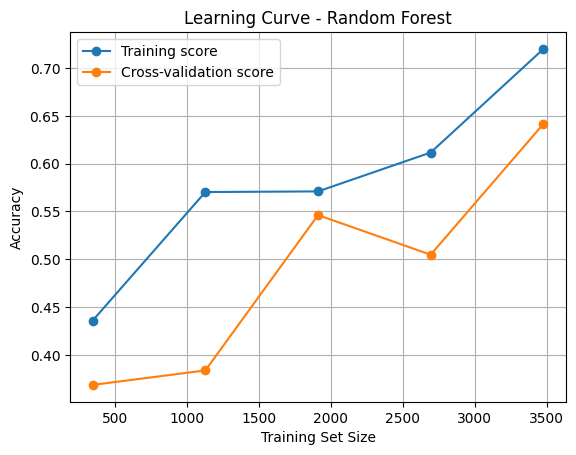

In [24]:
from sklearn.model_selection import learning_curve

# Learning curve untuk model Random Forest (hasil tuning)

# Gunakan rf_best dari hasil GridSearchCV
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_best, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean_rf = train_scores_rf.mean(axis=1)
test_scores_mean_rf = test_scores_rf.mean(axis=1)

plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', label="Training score")
plt.plot(train_sizes_rf, test_scores_mean_rf, 'o-', label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend(loc="best")
plt.grid()
plt.show()

### Simpan model Random Forest

In [27]:
# Simpan model SVM hasil tuning (svm_best)
joblib.dump(rf_best, 'rf_best_model.joblib')

['rf_best_model.joblib']

## 3. Logistic Regression Model

In [14]:
# === 6. Model Logistic Regression ===
print("\n=== Logistic Regression ===")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_imputed, y_train)
y_pred_lr = lr_model.predict(X_test_imputed)
print(classification_report(y_test, y_pred_lr))
print("Akurasi:", accuracy_score(y_test, y_pred_lr))


=== Logistic Regression ===
              precision    recall  f1-score   support

     negatif       0.94      0.97      0.95       290
      netral       0.81      0.95      0.87       290
     positif       0.97      0.77      0.86       290

    accuracy                           0.89       870
   macro avg       0.90      0.89      0.89       870
weighted avg       0.90      0.89      0.89       870

Akurasi: 0.8942528735632184


<Figure size 500x400 with 0 Axes>

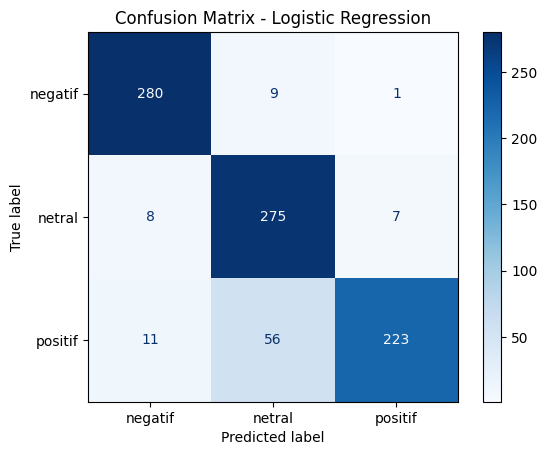

In [15]:
# Confusion matrix untuk model Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
plt.figure(figsize=(5,4))
disp_lr.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Hyperparameter Tuning dengan Grid Search CV

In [16]:
# Tuning Logistic Regression
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_imputed, y_train)
lr_best = lr_grid.best_estimator_
lr_pred = lr_best.predict(X_test_imputed)
print("\n=== Logistic Regression ===")
print("Best Parameters:", lr_grid.best_params_)
print("Akurasi:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


=== Logistic Regression ===
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Akurasi: 0.9229885057471264
              precision    recall  f1-score   support

     negatif       0.98      0.99      0.98       290
      netral       0.84      0.99      0.91       290
     positif       0.98      0.79      0.87       290

    accuracy                           0.92       870
   macro avg       0.93      0.92      0.92       870
weighted avg       0.93      0.92      0.92       870



<Figure size 500x400 with 0 Axes>

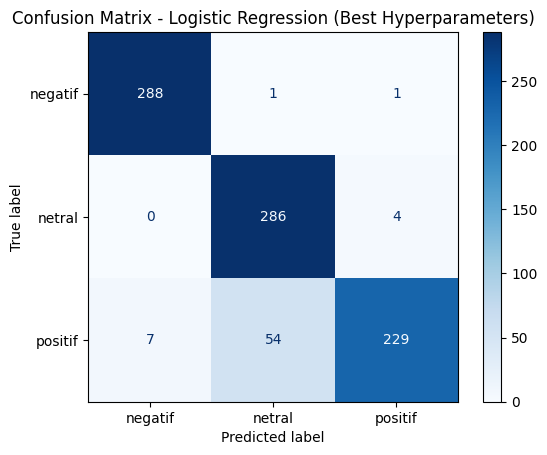

In [18]:
# Visualisasi confusion matrix untuk Logistic Regression hasil hyperparameter tuning
cm_lr_best = confusion_matrix(y_test, lr_pred, labels=lr_best.classes_)
disp_lr_best = ConfusionMatrixDisplay(confusion_matrix=cm_lr_best, display_labels=lr_best.classes_)
plt.figure(figsize=(5,4))
disp_lr_best.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression (Best Hyperparameters)")
plt.show()

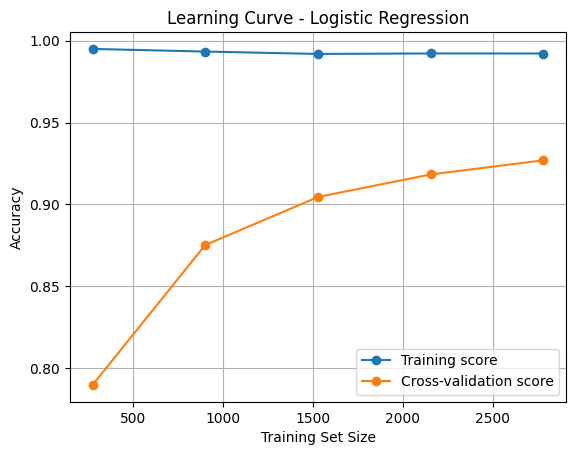

In [25]:
# Learning curve untuk model Logistic Regression (hasil tuning)

train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    lr_best, X_train_imputed, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean_lr = train_scores_lr.mean(axis=1)
test_scores_mean_lr = test_scores_lr.mean(axis=1)

plt.plot(train_sizes_lr, train_scores_mean_lr, 'o-', label="Training score")
plt.plot(train_sizes_lr, test_scores_mean_lr, 'o-', label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend(loc="best")
plt.grid()
plt.show()

### Simpan model Logistic Regression

In [28]:
# Simpan model SVM hasil tuning (svm_best)
joblib.dump(lr_best, 'lr_best_model.joblib')

['lr_best_model.joblib']